In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
driver1=pd.read_csv("driver1_info.csv",encoding="utf-8")
print(driver1.head())

   driver1fault  driver1responsibility  sex1  carcolor1  clpp1  jxmc1  \
0             9                      0     1        2.0      2      1   
1             1                      1     1        4.0      1      4   
2             7                      1     1        1.0      1      3   
3             8                      1     1        2.0      2      2   
4             7                      1     1        1.0      3      0   

   accident_month  accident_quarter  accident_weekday  accident_day   ...    \
0               1                 1                 4             2   ...     
1               1                 1                 0             5   ...     
2               1                 1                 0             5   ...     
3               1                 1                 1             6   ...     
4               1                 1                 2             7   ...     

   district         lng        lat  driver1_age_category  \
0       5.0  106.629636  2

In [27]:
driver1["temperature"]=(driver1["temperature_max"]+driver1["temperature_min"])/2
# print(driver1["temperature"])

In [28]:
driver1=driver1.drop(["driver1_days","maxtime_x","temperature_max","temperature_min",
                      "driver1_age","accident_quarter","driver1_years"],axis=1)
print(driver1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56651 entries, 0 to 56650
Data columns (total 29 columns):
driver1fault             56651 non-null int64
driver1responsibility    56651 non-null int64
sex1                     56651 non-null int64
carcolor1                56650 non-null float64
clpp1                    56651 non-null int64
jxmc1                    56651 non-null int64
accident_month           56651 non-null int64
accident_weekday         56651 non-null int64
accident_day             56651 non-null int64
accident_hour            56651 non-null int64
accident_minute          56651 non-null int64
is_province1             56651 non-null int64
is_city1                 56651 non-null int64
is_driver1_city          56651 non-null int64
is_driver1_province      56651 non-null int64
weather1                 56651 non-null int64
weather2                 56651 non-null int64
wind1                    56651 non-null int64
wind2                    56651 non-null int64
district       

In [29]:
driver1["fine_x"]=driver1["fine_x"].fillna(0)
driver1["score_x"]=driver1["score_x"].fillna(0)
driver1["wfxw_x"]=driver1["wfxw_x"].fillna(0)
driver1["xfcount_x"]=driver1["xfcount_x"].fillna(0)

In [30]:
district_count=driver1["district"].isnull().sum()
district_list=np.random.randint(0,5,district_count)*1.0
driver1["district"][np.isnan(driver1["district"])]=district_list

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
driver1["carcolor1"]=driver1["carcolor1"].fillna(0)

In [32]:
print(driver1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56651 entries, 0 to 56650
Data columns (total 29 columns):
driver1fault             56651 non-null int64
driver1responsibility    56651 non-null int64
sex1                     56651 non-null int64
carcolor1                56651 non-null float64
clpp1                    56651 non-null int64
jxmc1                    56651 non-null int64
accident_month           56651 non-null int64
accident_weekday         56651 non-null int64
accident_day             56651 non-null int64
accident_hour            56651 non-null int64
accident_minute          56651 non-null int64
is_province1             56651 non-null int64
is_city1                 56651 non-null int64
is_driver1_city          56651 non-null int64
is_driver1_province      56651 non-null int64
weather1                 56651 non-null int64
weather2                 56651 non-null int64
wind1                    56651 non-null int64
wind2                    56651 non-null int64
district       

In [33]:
from sklearn import preprocessing
driver1["lng"]=preprocessing.MinMaxScaler().fit_transform(driver1["lng"])
driver1["lat"]=preprocessing.MinMaxScaler().fit_transform(driver1["lat"])
# print(driver1["lng"])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

In [34]:
preprocessing.Imputer

sklearn.preprocessing.imputation.Imputer

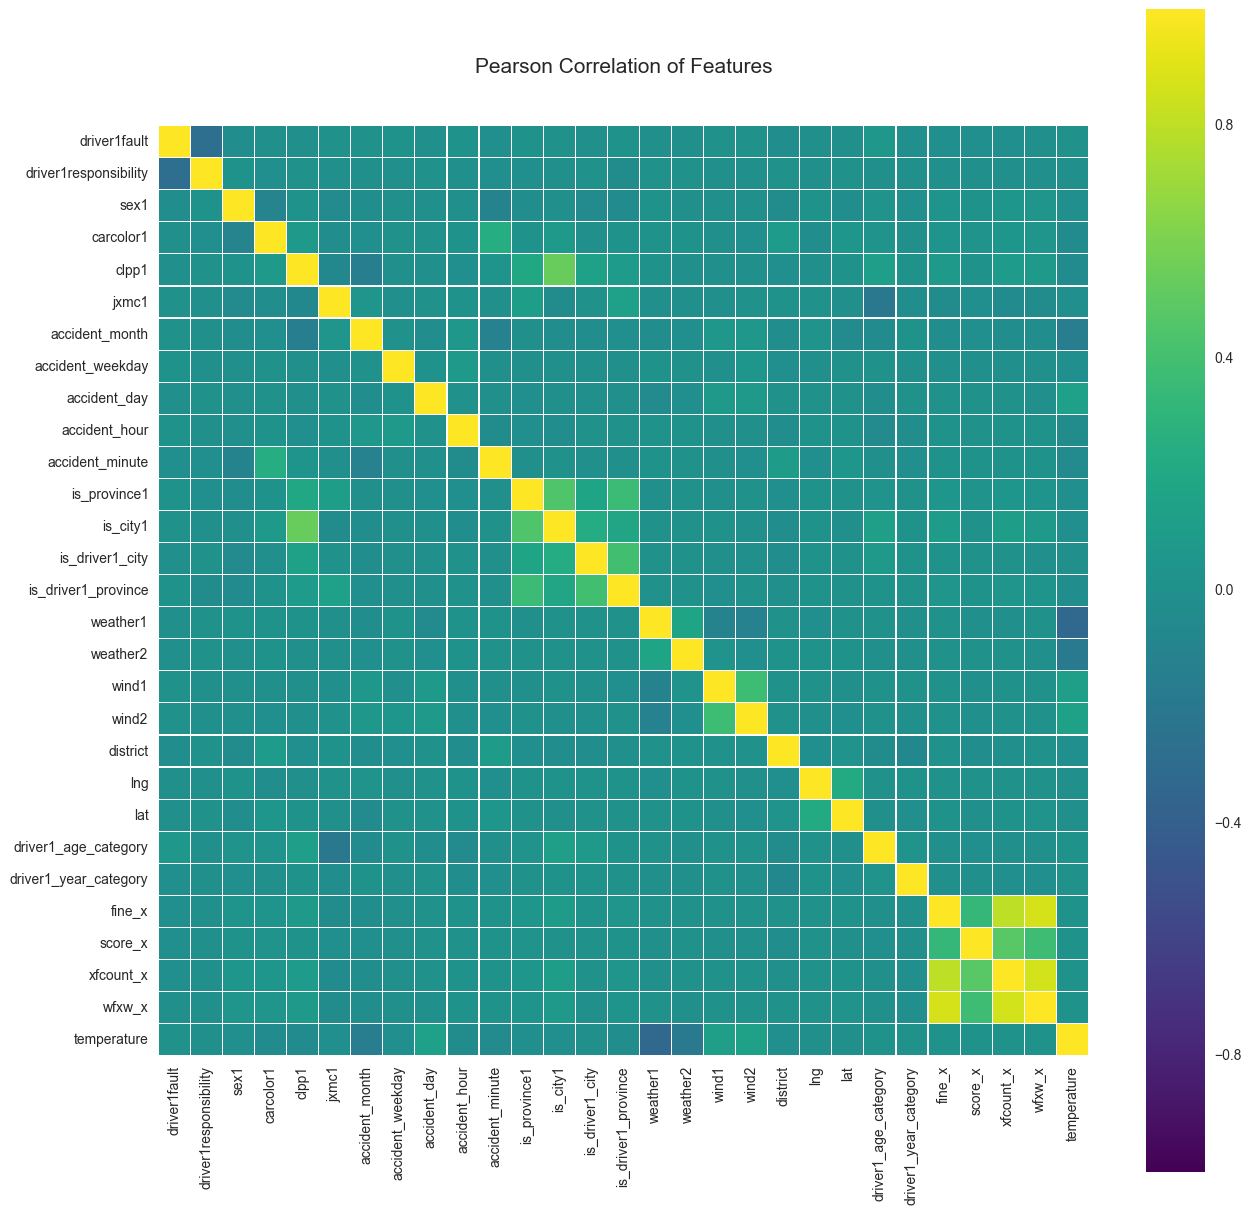

In [19]:
colormap=plt.cm.viridis
fig=plt.figure(figsize=(15,15))
plt.title("Pearson Correlation of Features",y=1.05,size=15)
sns.heatmap(driver1.astype(float).corr(),linewidths=0.1,vmax=1,
            square=True,cmap=colormap,linecolor="white",annot=False) 
# vmax,vmin 将cmap最大最小的颜色标记给 指定的值
#square 显示是否为正方形， annot 是否显示值
plt.show()
fig.savefig("driver1_feature_pearson.png")

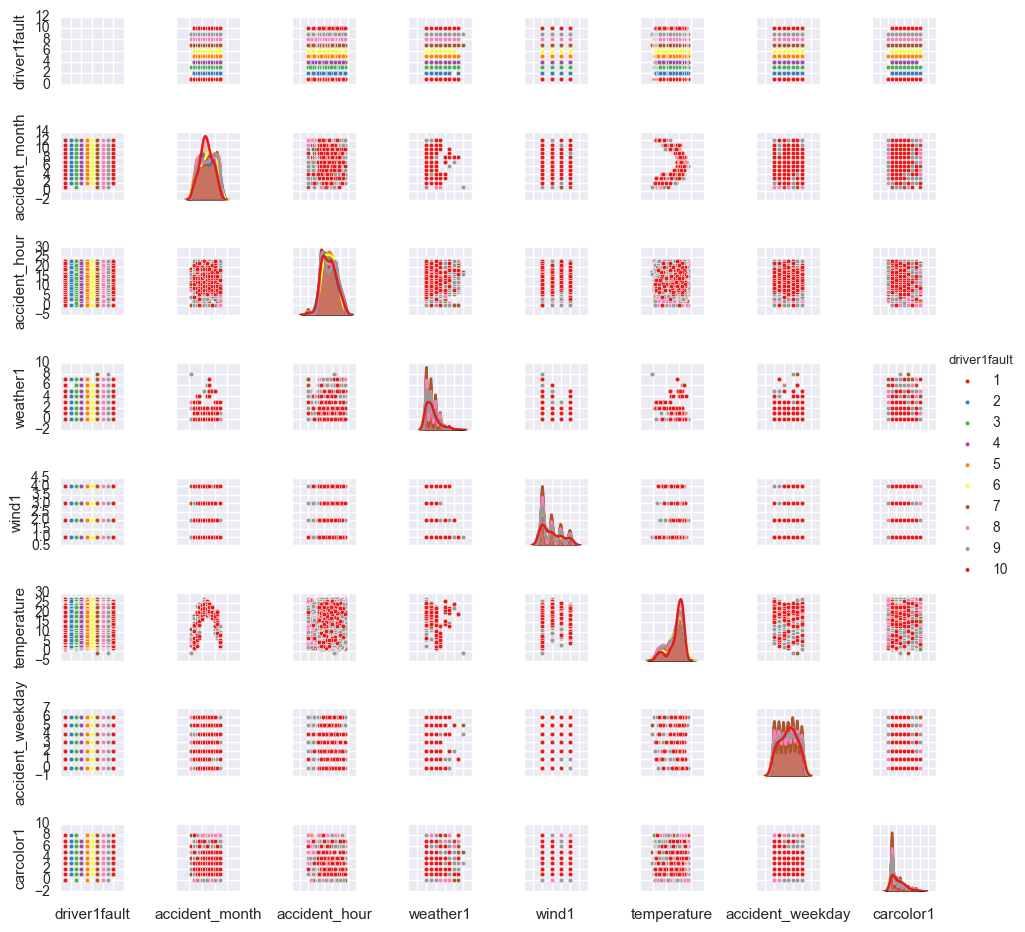

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


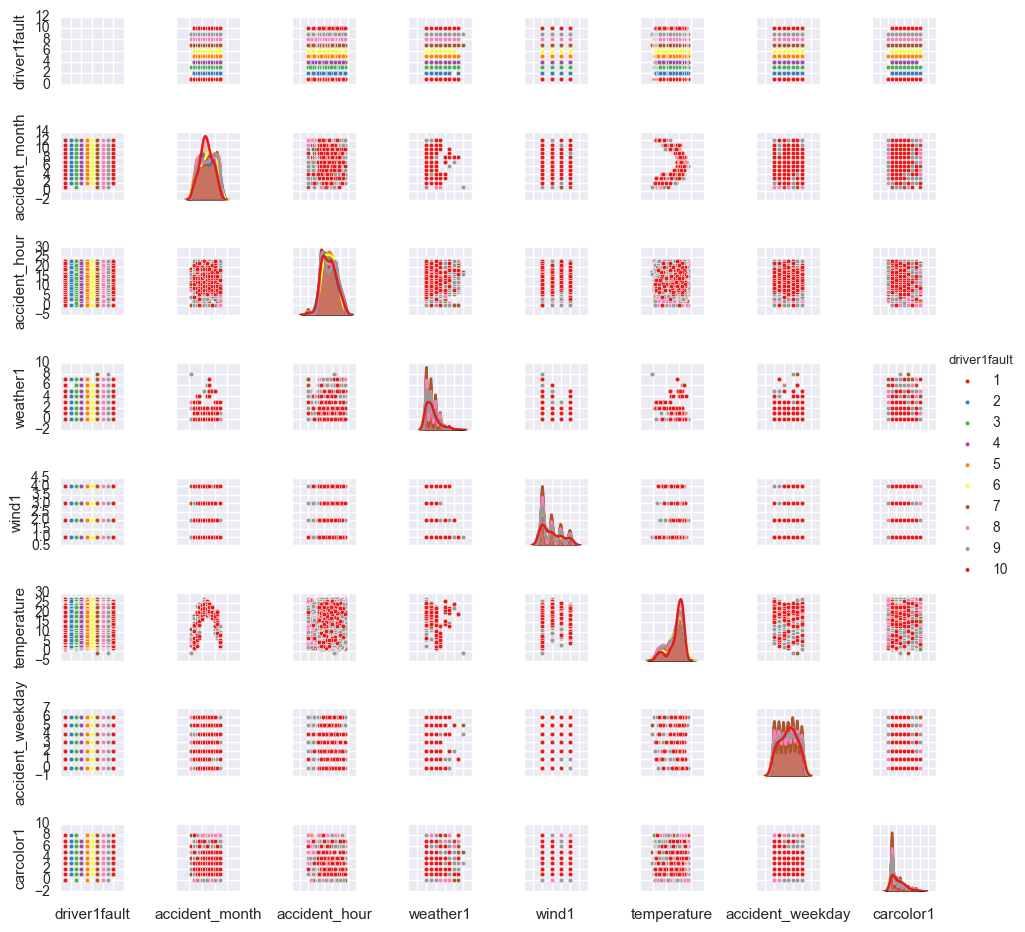

In [10]:
fig = plt.figure(figsize=(15, 15))
g = sns.pairplot(driver1[[u'driver1fault', u'accident_month', u'accident_hour'
    , u'weather1', u'wind1', u'temperature',u'accident_weekday', u'carcolor1']], 
    hue="driver1fault",palette="Set1", plot_kws=dict(s=10),
                 size=1.2, diag_kind='kde', diag_kws=dict(shade=True))

g.set(xticklabels=[])
plt.show()
fig.savefig("driver1_pairplot.png")

In [35]:
X=driver1
y=X["driver1fault"].ravel()
X=X.drop("driver1fault",axis=1)
X=X.values

In [36]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_sample,n_feature=X.shape
ss=KFold(n_sample,10,shuffle=True,random_state=5)
clf=RandomForestClassifier(n_jobs=-1,n_estimators=200,warm_start=True,
                           max_depth=None ,oob_score=True,max_features="sqrt",
                            verbose=0)
curracy=0
for train,test in ss:
    clf.fit(X[train],y[train])
    y_test=clf.predict(X[test])
    acc=accuracy_score(y[test],y_test)
    print("accuracy:",acc)
    curracy+=acc
print("average curracy:",curracy/10)

accuracy: 0.456583127427


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:267: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


accuracy: 0.999117387467


accuracy: 0.999646954987


accuracy: 0.999646954987


accuracy: 0.99947043248


accuracy: 0.999117387467


accuracy: 0.999293909974


accuracy: 0.99947043248


accuracy: 0.998764342454


accuracy: 0.999117387467
average curracy: 0.945022831719


In [ ]:
from skfeature.function.similarity_based import trace_ratio   
from skfeature.function.sparse_learning_based import ls_l21
from skfeature.function.statistical_based import f_score 
# f_score=ls_l21.proximal_gradient_descent(X,y,10)
scoref=f_score.f_score(X,y)
# scorer=fisher_score.fisher_score(X,y)
scoret=trace_ratio.trace_ratio(X,y,10)
print(scoref)
print(scoret)